In [1]:
import random
import matplotlib.pyplot as plt
from matplotlib.collections import PatchCollection
from matplotlib.patches import Rectangle
import math
import time

In [2]:
#Definitions of the different types of walkers
class FullRandomPerson:
    def __init__(self, color=None, radius=None, speed=None, position=None, distancing = False, bounds = 10, ms = 5, label = None):
    
        if color is not None:
            self.color = color
        else:
            self.color = (random.uniform(0,1),random.uniform(0,1),random.uniform(0,1))
        
        if radius is not None:    
            self.radius = radius
        else:
            self.radius = random.uniform(.2,.6)
            
        if speed is not None:    
            self.speed = speed
        else:
            self.speed = random.uniform(0,1)
            
        if speed is not None:    
            self.position = position
        else:
            self.position = [10*random.uniform(0,1),10*random.uniform(0,1)]
            
        self.distancing = distancing
        
        self.bounds = bounds
       
        self.ms = ms

        if label is not None:    
            self.label = label
            
    
    def display(self):
        plt.plot(self.position[0],self.position[1],marker='o',color=self.color,markersize=self.ms)
        
        circle1=plt.Circle((self.position[0],self.position[1]),self.radius,color=self.color, fill = False, clip_on = False)
        
        plt.gcf().gca().add_artist(circle1)
        
    def step(self):
        diag = math.sqrt(2)/2
        directions = [(1,0),(-1,0),(0,1),(0,-1),(diag,diag),(-diag,diag),(diag,-diag),(-diag,-diag)]
        
        
        if self.distancing:
        
            check = 20
            while check > 0:
                #print(check)
                move = random.choice(directions)
                
                proposed = [self.position[0]+self.speed*move[0],self.position[1]+self.speed*move[1]]
                proposed[0] = min(self.bounds,max(0,proposed[0]))
                proposed[1] = min(self.bounds,max(0,proposed[1]))

                away = len(persons)
         
                collided = False
         
                for ind in range(len(persons)):
                    
                    if ind != self.label:
                        p = persons[ind]
                        d = dists(proposed,p.position)
                        
                        if d > 0 and d < self.radius:
                            check = check - 1
                            self.direction = random.choice(list(range(8)))
                            collided = True
                            break
                
                if not collided:
                    self.position[0] = proposed[0]
                    self.position[1] = proposed[1]
                    check = 0
                    
            
        else:
            move = random.choice(directions)
            
            proposed = (self.position[0]+self.speed*move[0],self.position[1]+self.speed*move[1])
            
            self.position[0] = min(self.bounds,max(0,proposed[0]))
            self.position[1] = min(self.bounds,max(0,proposed[1]))
            
            
class FullDirectedPerson:
    def __init__(self, color=None, radius=None, speed=None, position=None, distancing = False, bounds = 10, ms = 5, direction = None, change_dir_prob = None, label = None):
    
        if color is not None:
            self.color = color
        else:
            self.color = (random.uniform(0,1),random.uniform(0,1),random.uniform(0,1))
        
        if radius is not None:    
            self.radius = radius
        else:
            self.radius = random.uniform(.2,.6)
            
        if speed is not None:    
            self.speed = speed
        else:
            self.speed = random.uniform(0,1)
            
        if speed is not None:    
            self.position = position
        else:
            self.position = [10*random.uniform(0,1),10*random.uniform(0,1)]
            
        if direction is not None:    
            self.direction = direction
        else:
            self.direction = random.choice(list(range(8)))
        
        if change_dir_prob is not None:    
            self.flip = change_dir_prob
        else:
            self.flip = random.uniform(0,.2)
            
        if label is not None:    
            self.label = label

            
        self.distancing = distancing
        
        self.bounds = bounds
       
        self.ms = ms
            
    
    def display(self):
        plt.plot(self.position[0],self.position[1],marker='o',color=self.color,markersize=self.ms)
        
        circle1=plt.Circle((self.position[0],self.position[1]),self.radius,color=self.color, fill = False, clip_on = False)
        
        plt.gcf().gca().add_artist(circle1)
        
    def step(self):
        diag = math.sqrt(2)/2
        directions = [(1,0),(-1,0),(0,1),(0,-1),(diag,diag),(-diag,diag),(diag,-diag),(-diag,-diag)]
        
        
        switch = random.uniform(0,1)
        if switch < self.flip:
            self.direction = random.choice(list(range(8)))        


        if self.distancing:
        
            check = 20
            while check > 0:
                #print(check)
                move = directions[self.direction]
                
                proposed = [self.position[0]+self.speed*move[0],self.position[1]+self.speed*move[1]]
                proposed[0] = min(self.bounds,max(0,proposed[0]))
                proposed[1] = min(self.bounds,max(0,proposed[1]))

                collided = False
         
                for ind in range(len(persons)):
                    
                    if ind != self.label:
                        p = persons[ind]
                        d = dists(proposed,p.position)
                        
                        if d > 0 and d < self.radius:
                            check = check - 1
                            self.direction = random.choice(list(range(8)))
                            collided = True
                            break
                
                if not collided:
                    self.position[0] = proposed[0]
                    self.position[1] = proposed[1]
                    check = 0
                    
            
        else:
            
            
            move = directions[self.direction]
            
            proposed = (self.position[0]+self.speed*move[0],self.position[1]+self.speed*move[1])
            
            self.position[0] = min(self.bounds,max(0,proposed[0]))
            self.position[1] = min(self.bounds,max(0,proposed[1]))
        
        


class BlockRandomPerson:
    def __init__(self, color=None, radius=None, speed=None, position=None, distancing = False, bounds = 10, ms = 5, label = None):
    
        if color is not None:
            self.color = color
        else:
            self.color = (random.uniform(0,1),random.uniform(0,1),random.uniform(0,1))
        
        if radius is not None:    
            self.radius = radius
        else:
            self.radius = random.uniform(.2,.6)
            
        if speed is not None:    
            self.speed = speed
        else:
            self.speed = random.uniform(0,1)
            
        if label is not None:    
            self.label = label
            
        if speed is not None:    
            self.position = position
        else:
            self.position = [random.uniform(0,1)+random.choice([0,1,4,5,8,9]),random.uniform(0,1)+random.choice([0,1,4,5,8,9])]
            
        self.distancing = distancing
        
        self.bounds = bounds
       
        self.ms = ms
            
    
    def display(self):
        plt.plot(self.position[0],self.position[1],marker='o',color=self.color,markersize=self.ms)
        
        circle1=plt.Circle((self.position[0],self.position[1]),self.radius,color=self.color, fill = False, clip_on = False)
        
        plt.gcf().gca().add_artist(circle1)
        
    def step(self):
        diag = math.sqrt(2)/2
        directions = [(1,0),(-1,0),(0,1),(0,-1),(diag,diag),(-diag,diag),(diag,-diag),(-diag,-diag)]
        
        
        if self.distancing:
        
            check = 20
            while check > 0:
                #print(check)
                move = random.choice(directions)
                
                proposed = [self.position[0]+self.speed*move[0],self.position[1]+self.speed*move[1]]
                proposed[0] = min(self.bounds,max(0,proposed[0]))
                proposed[1] = min(self.bounds,max(0,proposed[1]))
                
                if self.position[0] < 2 and 2 < proposed[0] < 4:
                    proposed[0] = 2
                    
                elif self.position[0] < 5 and 2 < proposed[0] < 4:
                    proposed[0] = 4
                    
                elif self.position[0] < 6 and 6 < proposed[0] < 8:
                    proposed[0] = 6
                    
                elif self.position[0] < 9 and 6 < proposed[0] < 8:
                    proposed[0] = 8

                if self.position[1] < 2 and 2 < proposed[1] < 4:
                    proposed[1] = 2
                    
                elif self.position[1] < 5 and 2 < proposed[1] < 4:
                    proposed[1] = 4
                    
                elif self.position[1] < 6 and 6 < proposed[1] < 8:
                    proposed[1] = 6
                    
                elif self.position[1] < 9 and 6 < proposed[1] < 8:
                    proposed[1] = 8
                
                    
         
                collided = False
         
                for ind in range(len(persons)):
                    
                    if ind != self.label:
                        p = persons[ind]
                        d = dists(proposed,p.position)
                        
                        if d > 0 and d < self.radius:
                            check = check - 1
                            self.direction = random.choice(list(range(8)))
                            collided = True
                            break
                
                if not collided:
                    self.position[0] = proposed[0]
                    self.position[1] = proposed[1]
                    check = 0                    
            
        else:
            move = random.choice(directions)
            
            proposed = (self.position[0]+self.speed*move[0],self.position[1]+self.speed*move[1])
            proposed[0] = min(self.bounds,max(0,proposed[0]))
            proposed[1] = min(self.bounds,max(0,proposed[1]))
            
            if self.position[0] < 2 and 2 < proposed[0] < 4:
                proposed[0] = 2
                
            elif self.position[0] < 5 and 2 < proposed[0] < 4:
                proposed[0] = 4
                
            elif self.position[0] < 6 and 6 < proposed[0] < 8:
                proposed[0] = 6
                
            elif self.position[0] < 9 and 6 < proposed[0] < 8:
                proposed[0] = 8

            if self.position[1] < 2 and 2 < proposed[1] < 4:
                proposed[1] = 2
                
            elif self.position[1] < 5 and 2 < proposed[1] < 4:
                proposed[1] = 4
                
            elif self.position[1] < 6 and 6 < proposed[1] < 8:
                proposed[1] = 6
                
            elif self.position[1] < 9 and 6 < proposed[1] < 8:
                proposed[1] = 8
            
            self.position[0] = proposed[0]
            self.position[1] = proposed[1]
            
            
class oldBlockDirectedPerson:
    def __init__(self, color=None, radius=None, speed=None, position=None, distancing = False, bounds = 10, ms = 5, direction = None, change_dir_prob = None, label = None):
    
        if color is not None:
            self.color = color
        else:
            self.color = (random.uniform(0,1),random.uniform(0,1),random.uniform(0,1))
        
        if radius is not None:    
            self.radius = radius
        else:
            self.radius = random.uniform(.2,.6)
            
        if speed is not None:    
            self.speed = speed
        else:
            self.speed = random.uniform(0,1)
            
        if position is not None:    
            self.position = position
        else:
            self.position = [random.uniform(0,1)+random.choice([0,1,4,5,8,9]),random.uniform(0,1)+random.choice([0,1,4,5,8,9])]
            
        if direction is not None:    
            self.direction = direction
        else:
            self.direction = random.choice(list(range(8)))
        
        if change_dir_prob is not None:    
            self.flip = change_dir_prob
        else:
            self.flip = random.uniform(0,.2)
            
        if label is not None:    
            self.label = label
            
        self.distancing = distancing
        
        self.bounds = bounds
       
        self.ms = ms
            
    
    def display(self):
        plt.plot(self.position[0],self.position[1],marker='o',color=self.color,markersize=self.ms)
        
        circle1=plt.Circle((self.position[0],self.position[1]),self.radius,color=self.color, fill = False, clip_on = False)
        
        plt.gcf().gca().add_artist(circle1)
        
    def step(self):
        diag = math.sqrt(2)/2
        directions = [(1,0),(-1,0),(0,1),(0,-1),(diag,diag),(-diag,diag),(diag,-diag),(-diag,-diag)]
        
        
        switch = random.uniform(0,1)
        if switch < self.flip:
            self.direction = random.choice(list(range(8)))        


        if self.distancing:
        
            check = 20
            while check > 0:
                #print(check)
                move = directions[self.direction]
                
                
                fproposed = [self.position[0]+self.speed*move[0],self.position[1]+self.speed*move[1]]
                proposed = []
                proposed.append(min(self.bounds,max(0,fproposed[0])))
                proposed.append(min(self.bounds,max(0,fproposed[1])))
                
                cproposed = [0,0]
                
                if fproposed[0] != proposed[0] or fproposed[1] != proposed[1]:
                    #print('boundary')
                    self.direction = random.choice(list(range(8)))
                
                if self.position[0] < 2 and 2 < proposed[0] < 4:
                    if 2 < proposed[1] < 4 or 6 < proposed[1] < 8:
                        cproposed[0] = 2
                        self.direction = random.choice(list(range(8)))
                    
                elif self.position[0] < 5 and 2 < proposed[0] < 4:
                    if 2 < proposed[1] < 4 or 6 < proposed[1] < 8:
                        cproposed[0] = 4
                        self.direction = random.choice(list(range(8)))
                    
                elif self.position[0] < 6 and 6 < proposed[0] < 8:
                    if 2 < proposed[1] < 4 or 6 < proposed[1] < 8:
                        cproposed[0] = 6
                        self.direction = random.choice(list(range(8)))
                    
                elif self.position[0] < 9 and 6 < proposed[0] < 8:
                    if 2 < proposed[1] < 4 or 6 < proposed[1] < 8:
                        cproposed[0] = 8
                        self.direction = random.choice(list(range(8)))

                if self.position[1] < 2 and 2 < proposed[1] < 4:
                    if 2 < proposed[0] < 4 or 6 < proposed[0] < 8:
                        cproposed[1] = 2
                        self.direction = random.choice(list(range(8)))
                    
                elif self.position[1] < 5 and 2 < proposed[1] < 4:
                    if 2 < proposed[0] < 4 or 6 < proposed[0] < 8:
                        cproposed[1] = 4
                        self.direction = random.choice(list(range(8)))
                    
                elif self.position[1] < 6 and 6 < proposed[1] < 8:
                    if 2 < proposed[0] < 4 or 6 < proposed[0] < 8:
                        cproposed[1] = 6
                        self.direction = random.choice(list(range(8)))
                    
                elif self.position[1] < 9 and 6 < proposed[1] < 8:
                    if 2 < proposed[0] < 4 or 6 < proposed[0] < 8:
                        cproposed[1] = 8
                        self.direction = random.choice(list(range(8)))
                    
                    
                collided = False
                
                if cproposed[0] != 0:
                    proposed[0] = cproposed[0]
                if cproposed[1] != 0:
                    proposed[1] = cproposed[1]
                    
         
                for ind in range(len(persons)):
                    
                    if ind != self.label:
                        p = persons[ind]
                        d = dists(proposed,p.position)
                        
                        if d > 0 and d < self.radius:
                            check = check - 1
                            self.direction = random.choice(list(range(8)))
                            collided = True
                            break
                
                if not collided:
                    
                    self.position[0] = proposed[0]
                    self.position[1] = proposed[1]
                    check = 0 
                    
            
        else:
            
            
            move = directions[self.direction]
            
            fproposed = [self.position[0]+self.speed*move[0],self.position[1]+self.speed*move[1]]
            proposed =[]
            proposed.append(min(self.bounds,max(0,fproposed[0])))
            proposed.append(min(self.bounds,max(0,fproposed[1])))
            
            cproposed = [0,0]

            if fproposed[0] != proposed[0] or fproposed[1] != proposed[1]:
                self.direction = random.choice(list(range(8)))

            
            if self.position[0] < 2 and 2 < proposed[0] < 4:
                if 2 < proposed[1] < 4 or 6 < proposed[1] < 8:
                    cproposed[0] = 2
                    self.direction = random.choice(list(range(8)))
                
            elif self.position[0] < 5 and 2 < proposed[0] < 4:
                if 2 < proposed[1] < 4 or 6 < proposed[1] < 8:
                    cproposed[0] = 4
                    self.direction = random.choice(list(range(8)))
                
            elif self.position[0] < 6 and 6 < proposed[0] < 8:
                if 2 < proposed[1] < 4 or 6 < proposed[1] < 8:
                    cproposed[0] = 6
                    self.direction = random.choice(list(range(8)))
                
            elif self.position[0] < 9 and 6 < proposed[0] < 8:
                if 2 < proposed[1] < 4 or 6 < proposed[1] < 8:
                    cproposed[0] = 8
                    self.direction = random.choice(list(range(8)))

            if self.position[1] < 2 and 2 < proposed[1] < 4:
                if 2 < proposed[0] < 4 or 6 < proposed[0] < 8:
                    cproposed[1] = 2
                    self.direction = random.choice(list(range(8)))
                
            elif self.position[1] < 5 and 2 < proposed[1] < 4:
                if 2 < proposed[0] < 4 or 6 < proposed[0] < 8:
                    cproposed[1] = 4
                    self.direction = random.choice(list(range(8)))
                
            elif self.position[1] < 6 and 6 < proposed[1] < 8:
                if 2 < proposed[0] < 4 or 6 < proposed[0] < 8:
                    cproposed[1] = 6
                    self.direction = random.choice(list(range(8)))
                
            elif self.position[1] < 9 and 6 < proposed[1] < 8:
                if 2 < proposed[0] < 4 or 6 < proposed[0] < 8:
                    cproposed[1] = 8
                    self.direction = random.choice(list(range(8)))
            
            
            if cproposed[0] != 0:
                proposed[0] = cproposed[0]
            if cproposed[1] != 0:
                proposed[1] = cproposed[1]
            
            self.position[0] = proposed[0]
            self.position[1] = proposed[1]
        
        
class BlockDirectedPerson:
    def __init__(self, color=None, radius=None, speed=None, position=None, distancing = False, bounds = 10, ms = 5, direction = None, change_dir_prob = None, label = None):
    
        if color is not None:
            self.color = color
        else:
            self.color = (random.uniform(0,1),random.uniform(0,1),random.uniform(0,1))
        
        if radius is not None:    
            self.radius = radius
        else:
            self.radius = random.uniform(.2,.6)
            
        if speed is not None:    
            self.speed = speed
        else:
            self.speed = random.uniform(0,1)
            
        if position is not None:    
            self.position = position
        else:
            self.position = [random.uniform(0,1)+random.choice([0,1,4,5,8,9]),random.uniform(0,1)+random.choice([0,1,4,5,8,9])]
            
        if direction is not None:    
            self.direction = direction
        else:
            self.direction = random.choice(list(range(8)))
        
        if change_dir_prob is not None:    
            self.flip = change_dir_prob
        else:
            self.flip = random.uniform(0,.2)
            
        if label is not None:    
            self.label = label
            
        self.distancing = distancing
        
        self.bounds = bounds
       
        self.ms = ms
            
    
    def display(self):
        plt.plot(self.position[0],self.position[1],marker='o',color=self.color,markersize=self.ms)
        
        circle1=plt.Circle((self.position[0],self.position[1]),self.radius,color=self.color, fill = False, clip_on = False)
        
        plt.gcf().gca().add_artist(circle1)
        
    def step(self):
        diag = math.sqrt(2)/2
        directions = [(1,0),(-1,0),(0,1),(0,-1),(diag,diag),(-diag,diag),(diag,-diag),(-diag,-diag)]
        
        
        switch = random.uniform(0,1)
        if switch < self.flip:
            self.direction = random.choice(list(range(8)))        


        if self.distancing:
        
            check = 20
            while check > 0:
                #print(check)
                
                wall = True
                
                while wall:
                    wall = False
                    move = directions[self.direction]
                    
                    
                    fproposed = [self.position[0]+self.speed*move[0],self.position[1]+self.speed*move[1]]
                    proposed = []
                    proposed.append(min(self.bounds,max(0,fproposed[0])))
                    proposed.append(min(self.bounds,max(0,fproposed[1])))
                    
                    cproposed = [0,0]
                    
                    if fproposed[0] != proposed[0] or fproposed[1] != proposed[1]:
                        #print('boundary')
                        self.direction = random.choice(list(range(8)))
                    
                    if 2 < proposed[0] < 4:
                        if 2 < proposed[1] < 4 or 6 < proposed[1] < 8:
                            
                            self.direction = random.choice(list(range(8)))
                            wall = True
                    
                    
                    elif  6 < proposed[0] < 8:
                        if 2 < proposed[1] < 4 or 6 < proposed[1] < 8:
                            self.direction = random.choice(list(range(8)))
                            wall = True
                        
        
                    if 2 < proposed[1] < 4:
                        if 2 < proposed[0] < 4 or 6 < proposed[0] < 8:
                            self.direction = random.choice(list(range(8)))
                            wall = True
                        
                        
                    elif  6 < proposed[1] < 8:
                        if 2 < proposed[0] < 4 or 6 < proposed[0] < 8:
                            self.direction = random.choice(list(range(8)))
                            wall = True
                    
                    
                collided = False
                
                if cproposed[0] != 0:
                    proposed[0] = cproposed[0]
                if cproposed[1] != 0:
                    proposed[1] = cproposed[1]
                    
         
                for ind in range(len(persons)):
                    
                    if ind != self.label:
                        p = persons[ind]
                        d = dists(proposed,p.position)
                        
                        if d > 0 and d < self.radius:
                            check = check - 1
                            self.direction = random.choice(list(range(8)))
                            collided = True
                            break
                
                if not collided:
                    
                    self.position[0] = proposed[0]
                    self.position[1] = proposed[1]
                    check = 0 
                    
            
        else:
            
            wall = True
            
            while wall is True:
                
                wall = False
            
            
                move = directions[self.direction]
                
                fproposed = [self.position[0]+self.speed*move[0],self.position[1]+self.speed*move[1]]
                proposed =[]
                proposed.append(min(self.bounds,max(0,fproposed[0])))
                proposed.append(min(self.bounds,max(0,fproposed[1])))
                
                
    
                if fproposed[0] != proposed[0] or fproposed[1] != proposed[1]:
                    self.direction = random.choice(list(range(8)))
    
                
                if 2 < proposed[0] < 4:
                    if 2 < proposed[1] < 4 or 6 < proposed[1] < 8:
                        
                        self.direction = random.choice(list(range(8)))
                        wall = True
                    
                    
                elif  6 < proposed[0] < 8:
                    if 2 < proposed[1] < 4 or 6 < proposed[1] < 8:
                        self.direction = random.choice(list(range(8)))
                        wall = True
                    
    
                if 2 < proposed[1] < 4:
                    if 2 < proposed[0] < 4 or 6 < proposed[0] < 8:
                        self.direction = random.choice(list(range(8)))
                        wall = True
                    
                    
                elif  6 < proposed[1] < 8:
                    if 2 < proposed[0] < 4 or 6 < proposed[0] < 8:
                        self.direction = random.choice(list(range(8)))
                        wall = True
                    
            
                        
            self.position[0] = proposed[0]
            self.position[1] = proposed[1]
        

class BlockOrientedPerson:
    def __init__(self, color=None, radius=None, speed=None, position=None, distancing = False, bounds = 10, ms = 5, direction = None, change_dir_prob = None, label = None):
    
        if color is not None:
            self.color = color
        else:
            self.color = (random.uniform(0,1),random.uniform(0,1),random.uniform(0,1))
        
        if radius is not None:    
            self.radius = radius
        else:
            self.radius = random.uniform(.2,.6)
            
        if speed is not None:    
            self.speed = speed
        else:
            self.speed = random.uniform(0,1)
            
        if position is not None:    
            self.position = position
        else:
            self.position = [random.uniform(0,1)+random.choice([0,1,4,5,8,9]),random.uniform(0,1)+random.choice([0,1,4,5,8,9])]
            
        if direction is not None:    
            self.direction = direction
        else:
            self.direction = random.choice(list(range(8)))
        
        if change_dir_prob is not None:    
            self.flip = change_dir_prob
        else:
            self.flip = random.uniform(0,.2)
            
        if label is not None:    
            self.label = label
            
        self.distancing = distancing
        
        self.bounds = bounds
       
        self.ms = ms
            
    
    def display(self):
        plt.plot(self.position[0],self.position[1],marker='o',color=self.color,markersize=self.ms)
        
        circle1=plt.Circle((self.position[0],self.position[1]),self.radius,color=self.color, fill = False, clip_on = False)
        
        plt.gcf().gca().add_artist(circle1)
        
    def step(self):
        diag = math.sqrt(2)/2
        directions = [(-diag,-diag),(-1,0),(-diag,diag),(0,1),(diag,diag),(1,0),(diag,-diag),(0,-1)]
        
        
        switch = random.uniform(0,1)
        if switch < self.flip:
            self.direction = random.choice(list(range(8)))        


        if self.distancing:
        
            check = 20
            while check > 0:
                #print(check)
                
                wall = True
                
                while wall:
                    wall = False
                    move = directions[self.direction]
                    
                    
                    fproposed = [self.position[0]+self.speed*move[0],self.position[1]+self.speed*move[1]]
                    proposed = []
                    proposed.append(min(self.bounds,max(0,fproposed[0])))
                    proposed.append(min(self.bounds,max(0,fproposed[1])))
                    
                    cproposed = [0,0]
                    
                    if fproposed[0] != proposed[0] or fproposed[1] != proposed[1]:
                        #print('boundary')
                        self.direction = (random.choice([-1,1]) + self.direction) %8
                    
                    if 2 < proposed[0] < 4:
                        if 2 < proposed[1] < 4 or 6 < proposed[1] < 8:
                            
                            self.direction = (random.choice([-1,1]) + self.direction) %8
                            wall = True
                    
                    
                    elif  6 < proposed[0] < 8:
                        if 2 < proposed[1] < 4 or 6 < proposed[1] < 8:
                            self.direction = (random.choice([-1,1]) + self.direction) %8
                            wall = True
                        
                            
                    
                collided = False
                
                if cproposed[0] != 0:
                    proposed[0] = cproposed[0]
                if cproposed[1] != 0:
                    proposed[1] = cproposed[1]
                    
         
                for ind in range(len(persons)):
                    
                    if ind != self.label:
                        p = persons[ind]
                        d = dists(proposed,p.position)
                        
                        if d > 0 and d < self.radius:
                            check = check - 1
                            self.direction = (random.choice([-1,1]) + self.direction) %8
                            collided = True
                            break
                
                if not collided:
                    
                    self.position[0] = proposed[0]
                    self.position[1] = proposed[1]
                    check = 0 
                    
            
        else:
            
            wall = True
            
            while wall is True:
                
                wall = False
            
            
                move = directions[self.direction]
                
                fproposed = [self.position[0]+self.speed*move[0],self.position[1]+self.speed*move[1]]
                proposed =[]
                proposed.append(min(self.bounds,max(0,fproposed[0])))
                proposed.append(min(self.bounds,max(0,fproposed[1])))
                
                
    
                if fproposed[0] != proposed[0] or fproposed[1] != proposed[1]:
                    self.direction = (random.choice([-1,1]) + self.direction) %8
    
                
                if 2 < proposed[0] < 4:
                    if 2 < proposed[1] < 4 or 6 < proposed[1] < 8:
                        
                        self.direction = (random.choice([-1,1]) + self.direction) %8
                        wall = True
                    
                    
                elif  6 < proposed[0] < 8:
                    if 2 < proposed[1] < 4 or 6 < proposed[1] < 8:
                        self.direction = (random.choice([-1,1]) + self.direction) %8
                        wall = True
                    
                        
            
                        
            self.position[0] = proposed[0]
            self.position[1] = proposed[1]


def dists(p1, p2):
    return math.sqrt((p1[0]-p2[0])**2 + (p1[1]-p2[1])**2)  
            



In [3]:
global persons

#persons = [FullDirectedPerson(radius = .35, distancing = True, change_dir_prob = .1, label = x) for x in range(5)]
#persons = [BlockRandomPerson(radius = .35, distancing = True, label = x) for x in range(5)]
persons = [BlockDirectedPerson(radius = .35, distancing = True, change_dir_prob = .05, speed=random.uniform(.1,.4), label = x) for x in range(10)]
persons = [BlockDirectedPerson( distancing = True, change_dir_prob = .02,  label = x) for x in range(10)]
persons = [BlockDirectedPerson(ms = 5, radius =random.uniform(.25,.5), distancing = True, change_dir_prob = .03, speed=random.uniform(.01,.1), label = x) for x in range(20)]
persons = [BlockOrientedPerson(ms = 5, radius =random.uniform(.45,.65), distancing = True, change_dir_prob = .05, speed=random.uniform(.01,.2), label = x) for x in range(20)]







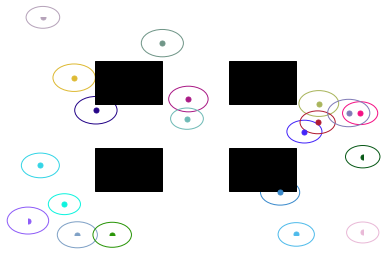

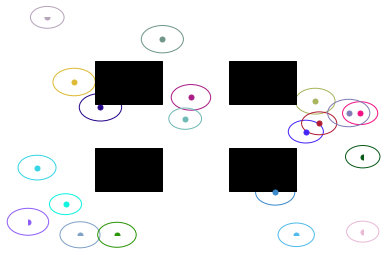

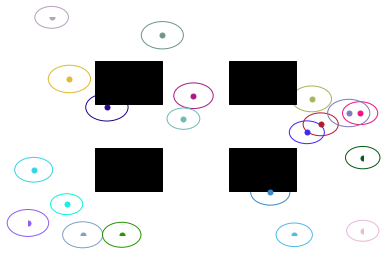

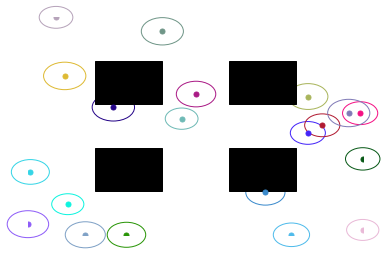

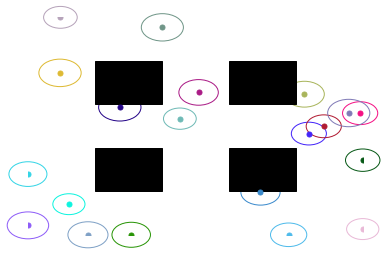

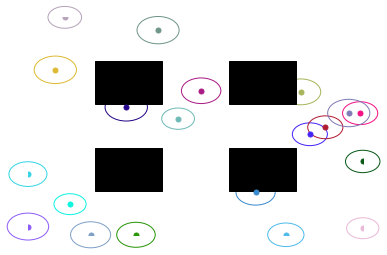

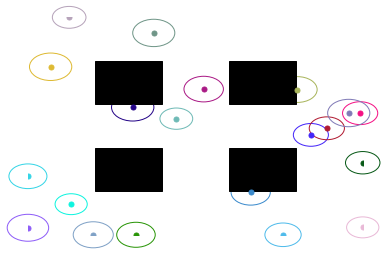

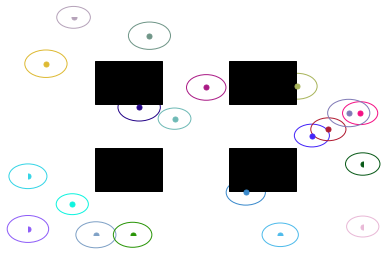

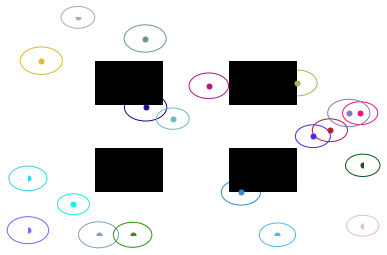

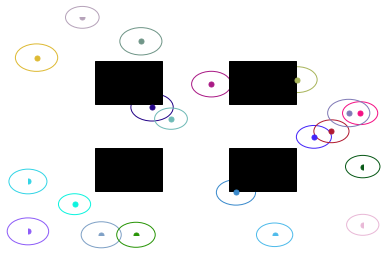

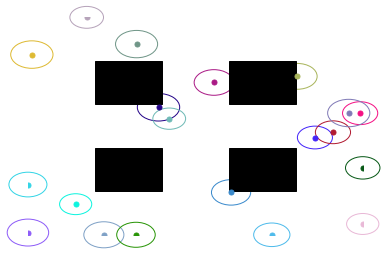

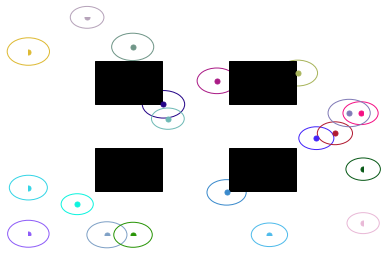

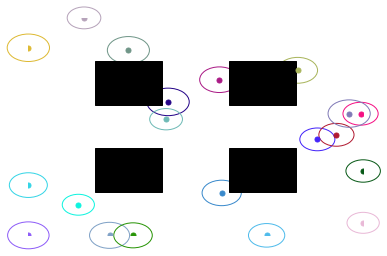

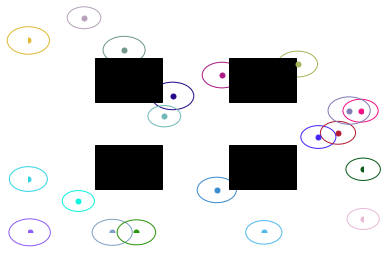

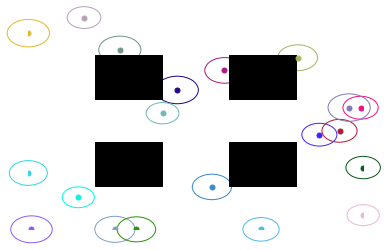

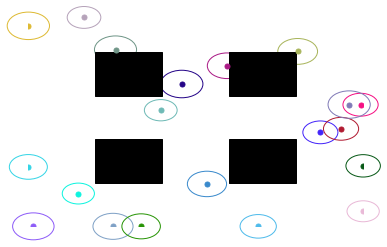

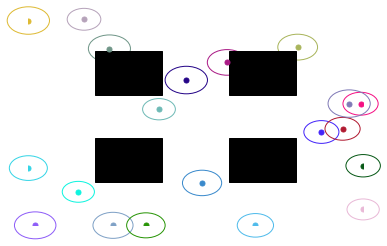

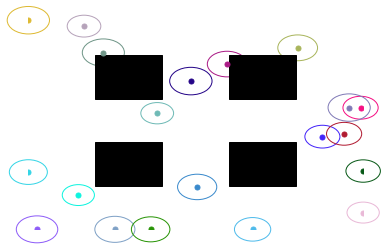

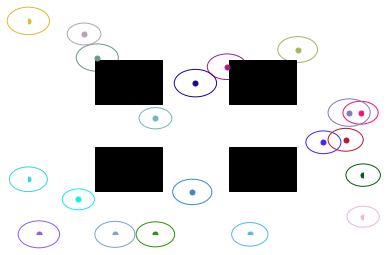

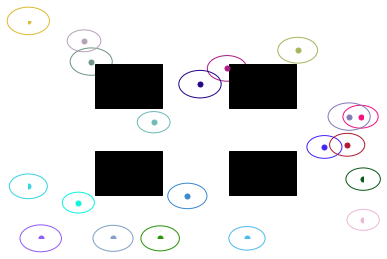

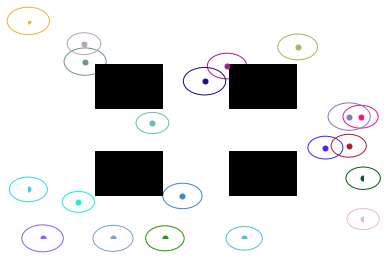

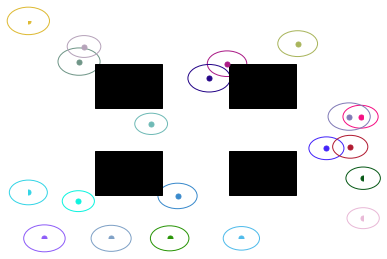

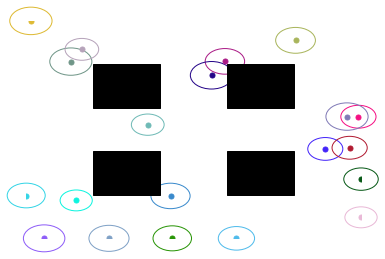

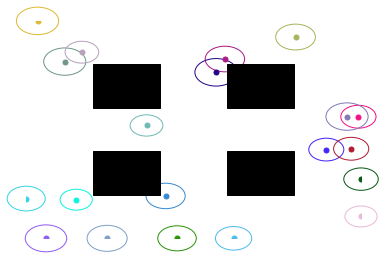

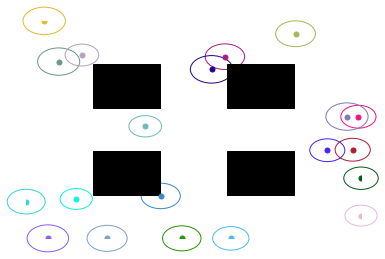

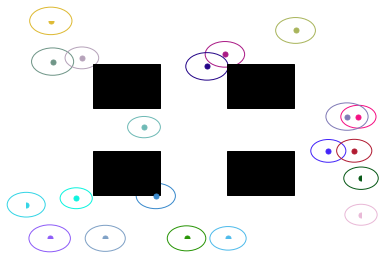

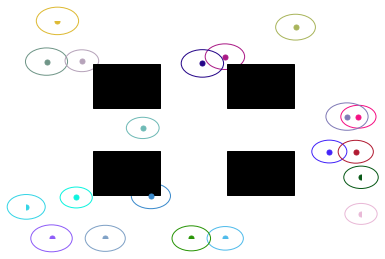

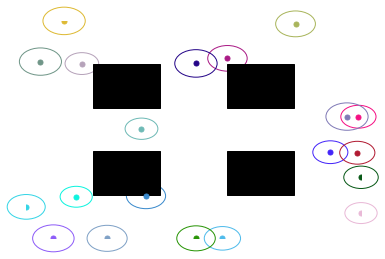

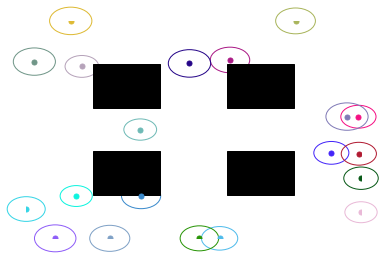

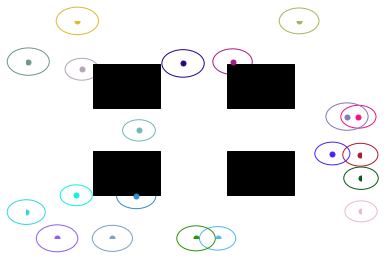

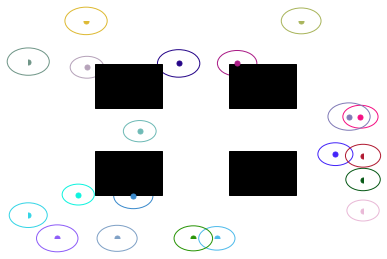

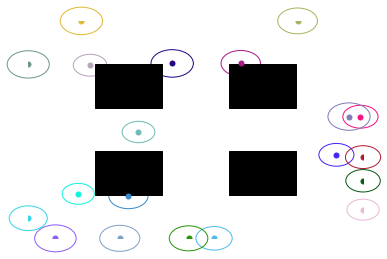

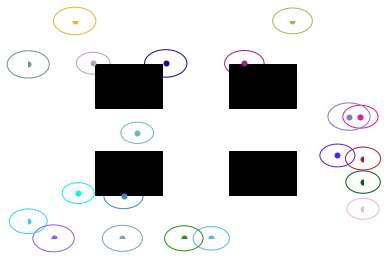

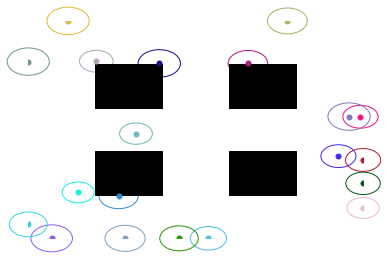

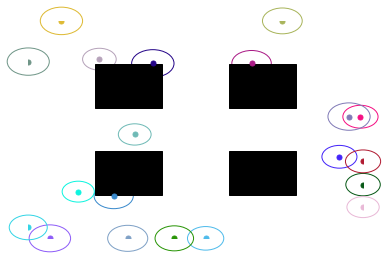

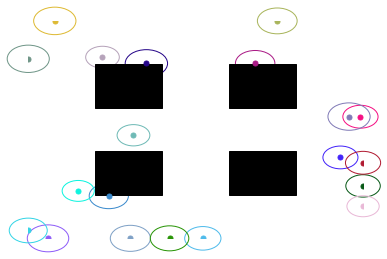

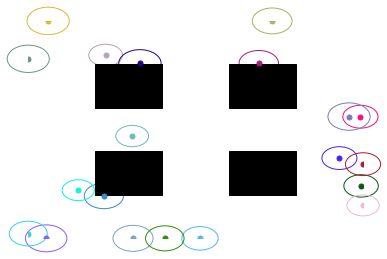

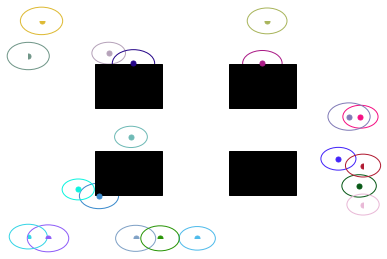

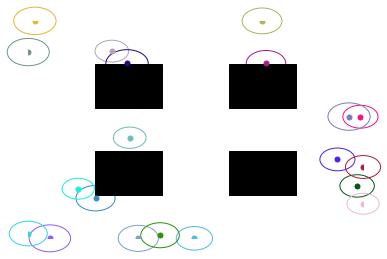

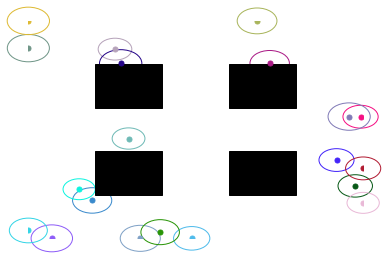

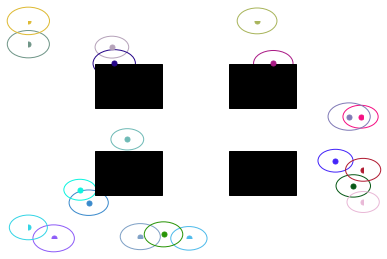

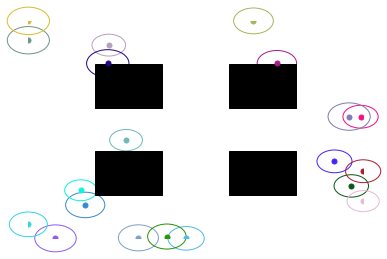

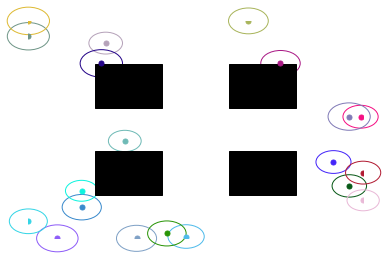

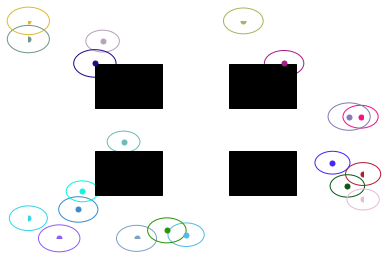

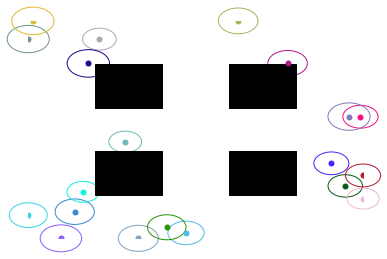

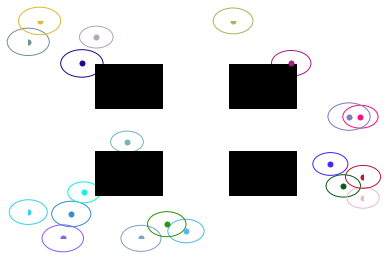

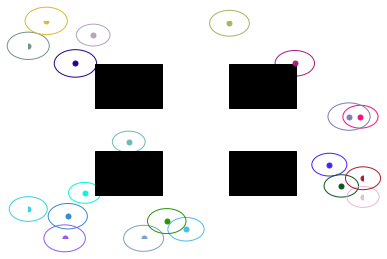

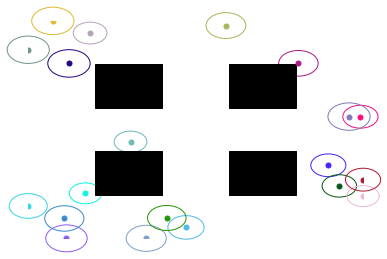

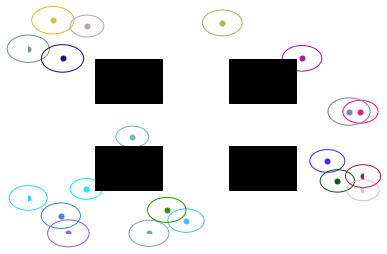

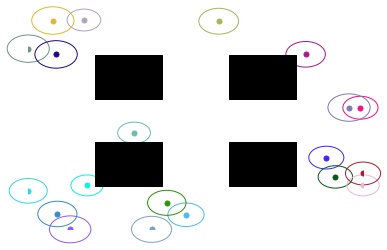

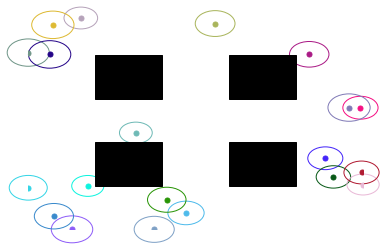

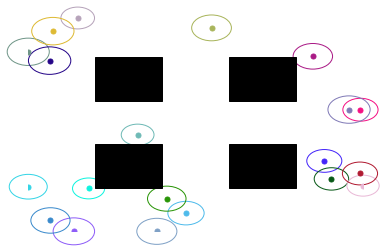

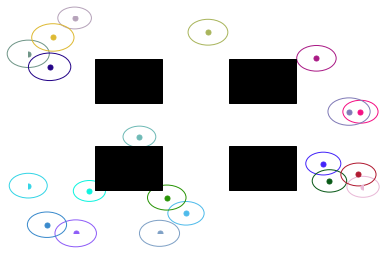

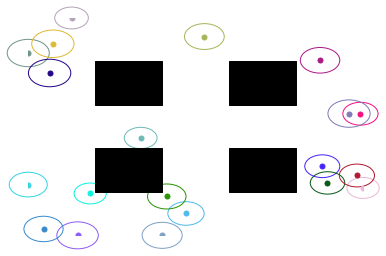

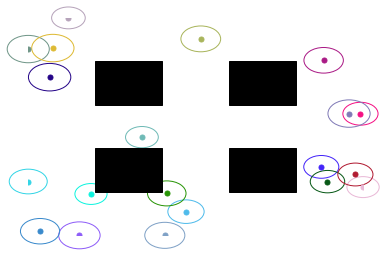

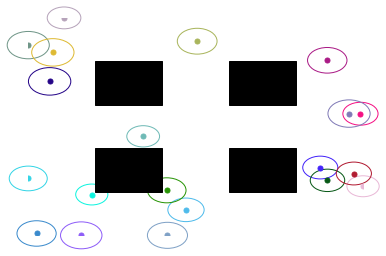

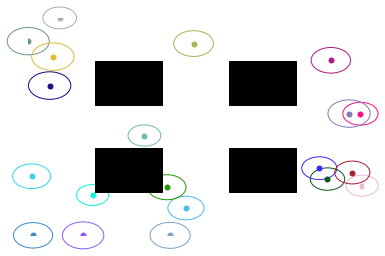

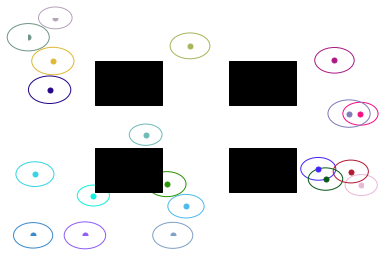

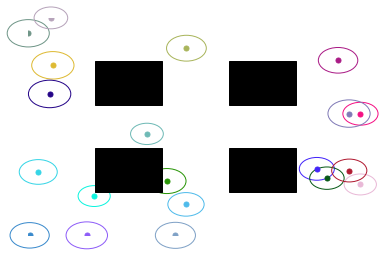

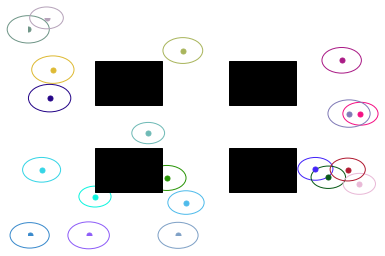

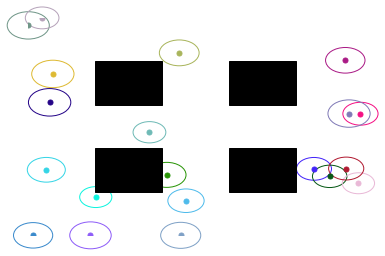

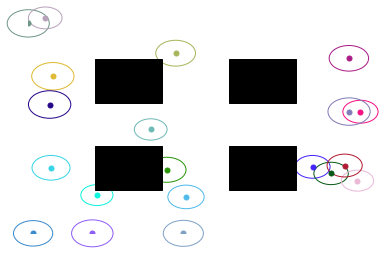

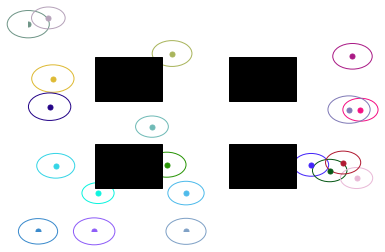

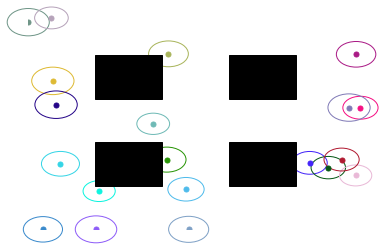

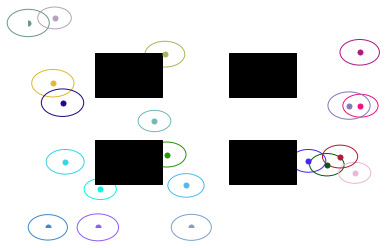

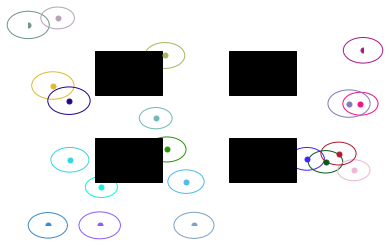

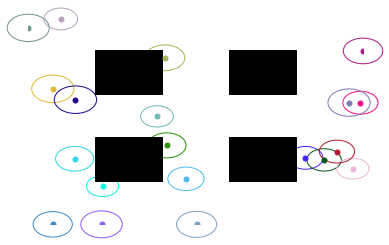

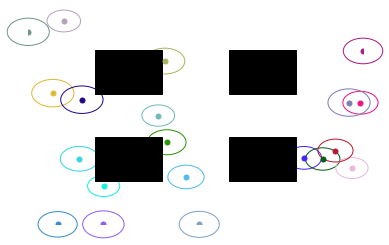

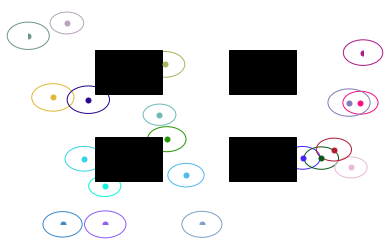

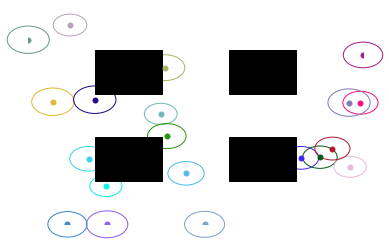

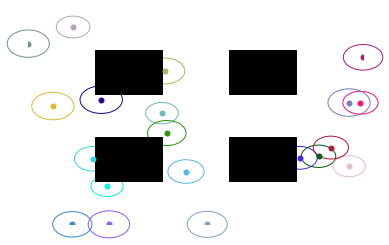

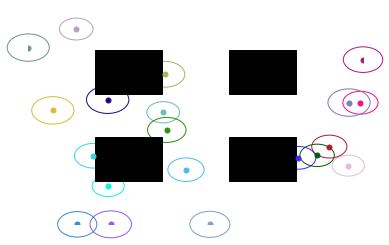

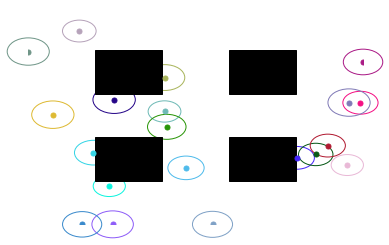

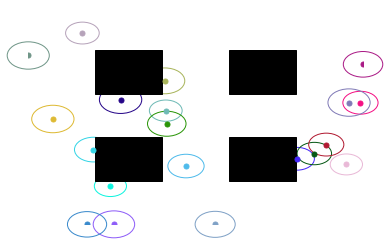

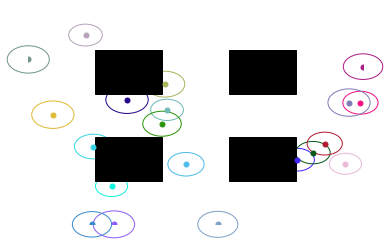

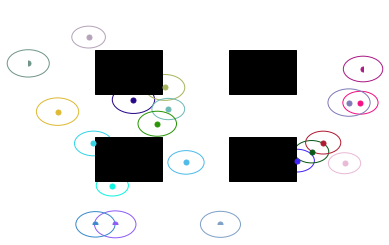

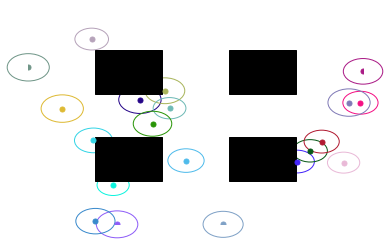

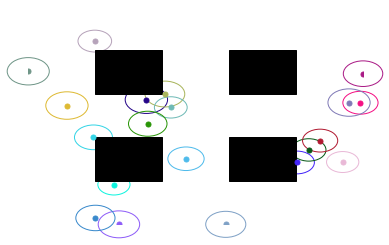

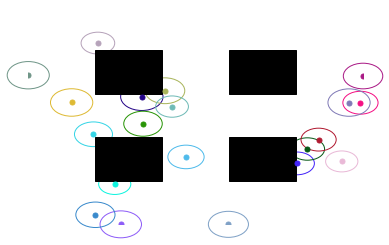

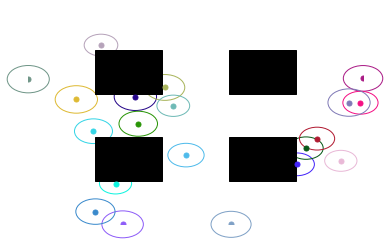

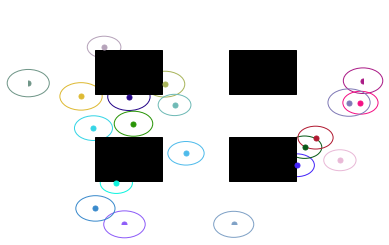

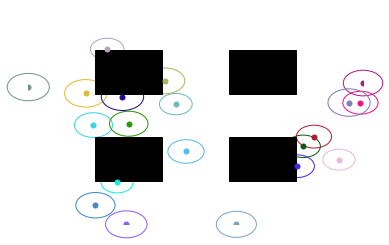

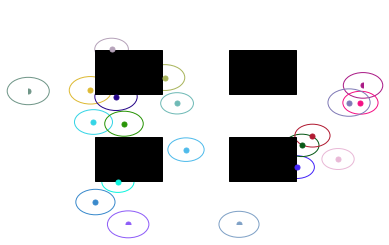

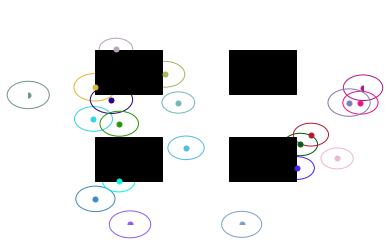

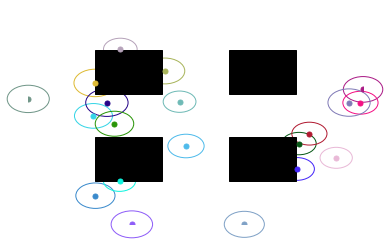

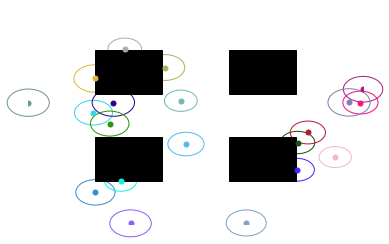

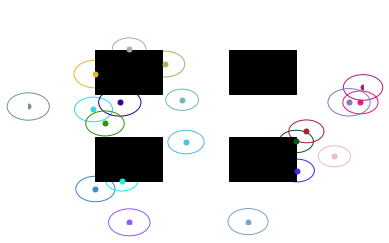

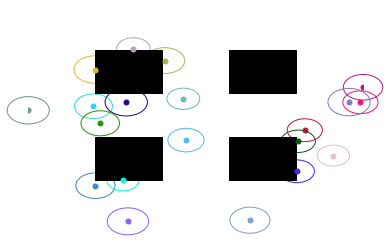

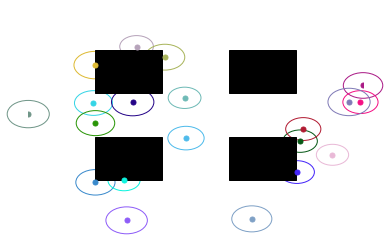

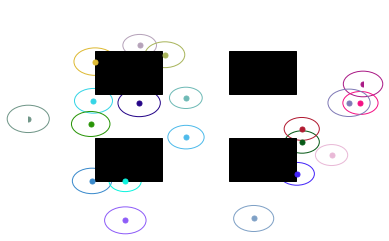

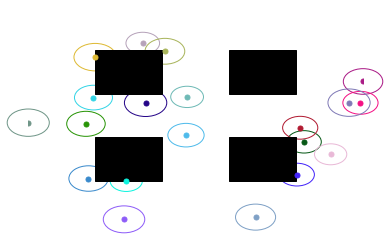

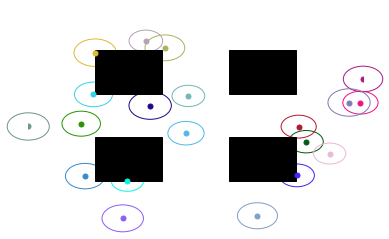

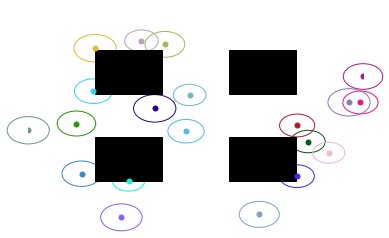

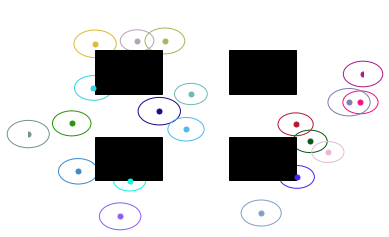

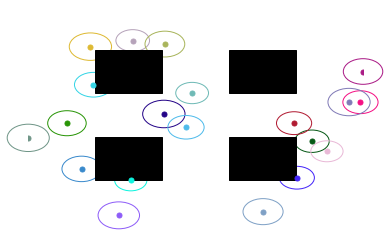

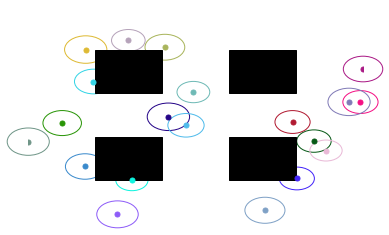

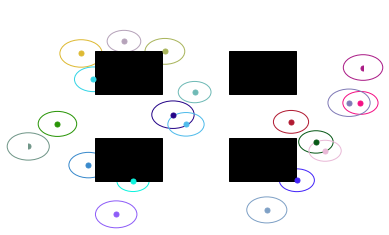

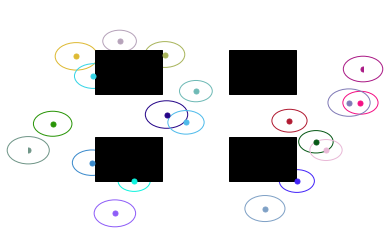

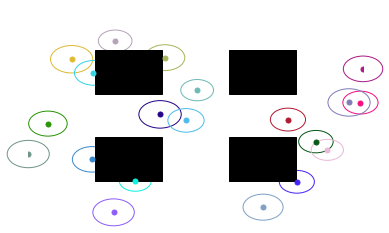

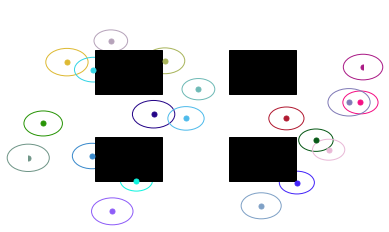

In [12]:
blocks = True
ind = 0
for i in range(100):
    
    
    for people in persons:
           
        people.step()

        
    plt.figure()
    plt.xlim([0,10])
    plt.ylim([0,10])

    for people in persons:

        people.display()


    if blocks:
        r1 = Rectangle((2,2),2,2,color='k')
        r2 = Rectangle((2,6),2,2,color='k')
        r3 = Rectangle((6,2),2,2,color='k')
        r4 = Rectangle((6,6),2,2,color='k')
        plt.gcf().gca().add_artist(r1)
        plt.gcf().gca().add_artist(r2)
        plt.gcf().gca().add_artist(r3)
        plt.gcf().gca().add_artist(r4)
    
    plt.axis('off')
    plt.savefig(f'output_images/fig{ind}.png')
    plt.show()
    ind += 1
        
    plt.close()



In [13]:
!ffmpeg -i output_images/fig%d.png -vf "fps=10,scale=320:-1:flags=lanczos,split[s0][s1];[s0]palettegen[p];[s1][p]paletteuse" output_images/combined_images.gif

ffmpeg version 5.0 Copyright (c) 2000-2022 the FFmpeg developers
  built with Apple clang version 13.0.0 (clang-1300.0.29.3)
  configuration: --prefix=/usr/local/Cellar/ffmpeg/5.0 --enable-shared --enable-pthreads --enable-version3 --cc=clang --host-cflags= --host-ldflags= --enable-ffplay --enable-gnutls --enable-gpl --enable-libaom --enable-libbluray --enable-libdav1d --enable-libmp3lame --enable-libopus --enable-librav1e --enable-librist --enable-librubberband --enable-libsnappy --enable-libsrt --enable-libtesseract --enable-libtheora --enable-libvidstab --enable-libvmaf --enable-libvorbis --enable-libvpx --enable-libwebp --enable-libx264 --enable-libx265 --enable-libxml2 --enable-libxvid --enable-lzma --enable-libfontconfig --enable-libfreetype --enable-frei0r --enable-libass --enable-libopencore-amrnb --enable-libopencore-amrwb --enable-libopenjpeg --enable-libspeex --enable-libsoxr --enable-libzmq --enable-libzimg --disable-libjack --disable-indev=jack --enable-videotoolbox
  liba